In [5]:
import matplotlib.pyplot as plt
from skimage import io
import glob
import spectral.io.envi as envi
import shutil
import numpy as np
import cv2
import glob

In [67]:
def loadImages(image1Name, image2Name):
    maskBasePath = "pieces_data/masks/"
    maskEnding = "_labeledMask.png"
    
    image1Mask = io.imread(maskBasePath+image1Name+maskEnding)[:,:,0]
    image2Mask = io.imread(maskBasePath+image2Name+maskEnding)[:,:,0]
    
    image1Info = image1Name.split("_")
    image2Info = image2Name.split("_")
    
    image1FolderPath = "Ceramica/"+image1Info[0]+"/"+image1Info[0]+"_"+image1Info[1]+"/"+image1Info[2]+"_"+image1Info[3]+"/"
    image2FolderPath = "Ceramica/"+image2Info[0]+"/"+image2Info[0]+"_"+image2Info[1]+"/"+image2Info[2]+"_"+image2Info[3]+"/"

    image1PNGPath = glob.glob(image1FolderPath+'*.png')[0].replace('\\','/')
    image1Path = glob.glob(image1FolderPath+'*capture/*.hdr')[0].replace('\\','/')
    image2PNGPath = glob.glob(image2FolderPath+'*.png')[0].replace('\\','/')
    image2Path = glob.glob(image2FolderPath+'*capture/*.hdr')[0].replace('\\','/')
    
    image1PNG = io.imread(image1PNGPath)
    image2PNG = io.imread(image2PNGPath)
    image1 = envi.open(image1Path)[:,:,:]
    image2 = envi.open(image2Path)[:,:,:]
    
    return image1PNG, image2PNG, image1Mask, image2Mask, image1, image2

In [92]:
def createNewImage(image1Name, image2Name, class1, class2, image1Pieces, image2Pieces, newName):
    images = loadImages(image1Name, image2Name)
    newImage=np.zeros(images[4].shape)
    newPNGImage=np.zeros(images[0].shape)
    newMaskImage=np.zeros(images[0].shape[0:2])
    for i in image1Pieces:
        indexes = images[2]==i
        newImage[indexes]=images[4][indexes]
        newPNGImage[indexes]=images[0][indexes]
        newMaskImage[indexes]=class1
    for i in image2Pieces:
        indexes = images[3]==i
        newImage[indexes]=images[5][indexes]
        newPNGImage[indexes]=images[1][indexes]
        newMaskImage[indexes]=class2
        
    plt.imshow(newPNGImage/255)
    plt.show()
    plt.imshow(newMaskImage,vmin=0, vmax=255,cmap='gray')
    plt.show()
    plt.imsave("CustomImages/"+newName+"_color.png",newPNGImage/255)
    plt.imsave("CustomImages/"+newName+".png",newMaskImage,vmin=0, vmax=255,cmap='gray')
    envi.save_image("CustomImages/"+newName+".hdr",newImage,force=True)

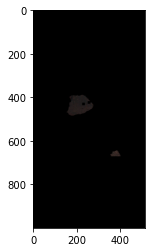

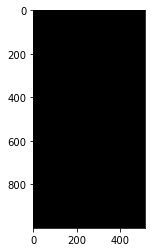

In [94]:
createNewImage("g1_01_1_A", "g1_01_1_B", 0, 0,[1],[2], "test")